# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


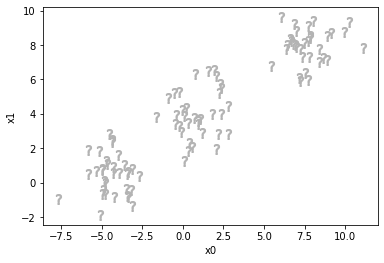

In [3]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

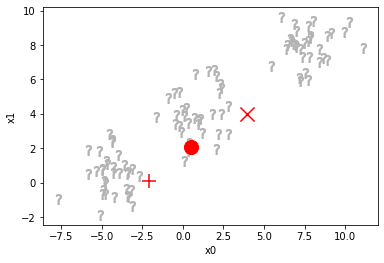

In [4]:
np.random.seed(3)
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [5]:
clusters

,x0,x1,label
0,0.507979,2.081478,o
1,-2.090953,0.108276,+
2,3.929470,3.962931,x


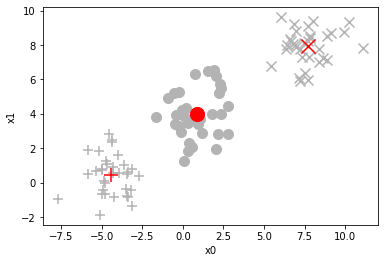

In [6]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = clusters["label"].values
        
    def plot(self):
        ax = km_scatter(self.df, s=100, c="0.7")
        km_scatter(self.clusters, s=200, c="red", ax=ax)

    def assign_points(self):
        for cluster in self.clusters.itertuples():
            x0_diff = self.df["x0"] - cluster.x0
            x1_diff = self.df["x1"] - cluster.x1
            dist = (x0_diff ** 2 + x1_diff ** 2) ** 0.5
            self.df[cluster.label] = dist
        lbl = self.labels[self.df[self.labels].values.argmin(axis=1)]
        self.df["label"] = lbl

    def update_centers(self):
        for cluster in self.clusters.itertuples():
            subset = self.df[self.df["label"] == cluster.label]
            x0 = subset["x0"].mean()
            x1 = subset["x1"].mean()
            self.clusters.at[cluster.Index, "x0"] = x0
            self.clusters.at[cluster.Index, "x1"] = x1
        
km = KM(df, clusters)

for epoch in range(10):
    km.assign_points()
    km.update_centers()
km.plot()

In [7]:
km.df

,x0,x1,o,+,x,label
0,8.370099,7.747045,8.399553,14.727486,0.695505,x
1,-2.701740,0.395336,5.057144,1.712172,12.838494,+
2,-3.204128,-0.407438,5.984516,1.473332,13.720805,+
3,-3.132762,-1.335692,6.652576,2.184581,14.249169,+
4,7.152737,6.069995,6.629118,12.866254,1.932494,x
...,...,...,...,...,...,...
95,-4.681343,1.086141,6.253922,0.704917,14.141920,+
96,-3.410109,0.515456,5.502204,1.006656,13.351683,+
97,0.683092,3.737246,0.304807,6.073362,8.168962,o
98,7.744654,7.293236,7.638137,13.959504,0.632635,x


# KMeans in sklearn

In [8]:
km2 = KMeans(3)

In [9]:
# 1. fit
km2.fit(df)
km2.cluster_centers_

array([[ 7.69751168,  7.9241129 ],
       [-4.41347291,  0.43410278],
       [ 0.85985598,  3.98556415]])

In [10]:
km.clusters

,x0,x1,label
0,0.859856,3.985564,o
1,-4.413473,0.434103,+
2,7.697512,7.924113,x


In [13]:
# 2. transform
km2.transform(df.head())

array([[ 0.69550479, 14.72748598,  8.39955315],
       [12.83849367,  1.71217188,  5.057144  ],
       [13.72080475,  1.47333179,  5.984516  ],
       [14.24916908,  2.18458064,  6.65257594],
       [ 1.93249405, 12.86625407,  6.62911793]])

In [14]:
km.df.head()

,x0,x1,o,+,x,label
0,8.370099,7.747045,8.399553,14.727486,0.695505,x
1,-2.701740,0.395336,5.057144,1.712172,12.838494,+
2,-3.204128,-0.407438,5.984516,1.473332,13.720805,+
3,-3.132762,-1.335692,6.652576,2.184581,14.249169,+
4,7.152737,6.069995,6.629118,12.866254,1.932494,x


In [ ]:
# 3. predict

# How many clusters?

# KMeans as Preprocessing

Sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

train, test = train_test_split(make_data())

In [ ]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["y"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="red", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

# StandardScaler with KMeans

In [ ]:
x = datasets.make_blobs(centers=np.array([(0,0), (0,20), (3,20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6,6))